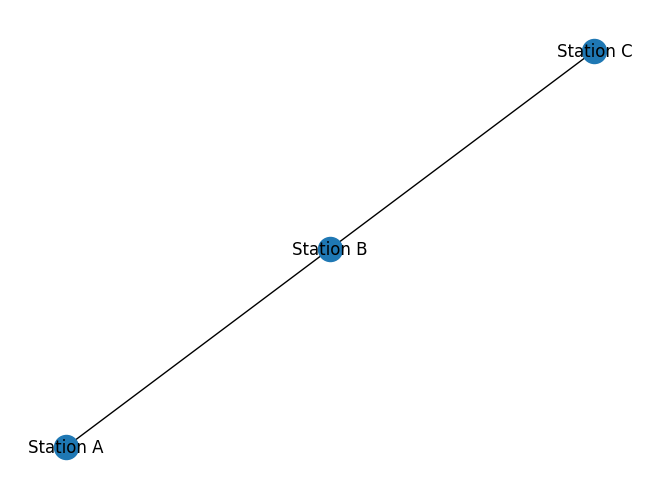

In [20]:
import networkx as nx

# Création du graphe
metro_network = nx.Graph()

# Ajout des stations en tant que nœuds
stations = ['Station A', 'Station B', 'Station C']
metro_network.add_nodes_from(stations)

# Ajout des connexions entre les stations en tant qu'arêtes
connections = [('Station A', 'Station B'), ('Station B', 'Station C')]
metro_network.add_edges_from(connections)

# Visualisation du réseau de métro
nx.draw(metro_network, with_labels=True)



In [21]:
import simpy

def metro_arrival(env, station, direction, schedule):
    while True:
        if schedule[station][direction]:
            next_arrival = schedule[station][direction].pop(0)
            yield env.timeout(next_arrival - env.now)
            print(f"Métro arrivé à {station} en direction de {direction} à {env.now}")
        else:
            # Gérer le cas où la liste des horaires est vide pour cette station et direction
            print(f"Plus d'horaire pour {station} en direction de {direction}")
            yield env.timeout(10)  # Attendre un certain temps avant de vérifier à nouveau


# Fonction principale de simulation
def simulate_schedule():
    # Créer un environnement de simulation
    env = simpy.Environment()
    
    # Créer un horaire pour chaque station et direction (à titre d'exemple)
    schedule = {
        'Station A': {
            'Direction X': [10, 30, 50],  # Exemple d'horaires d'arrivée (en minutes)
            'Direction Y': [15, 40, 60]
        },
        'Station B': {
            'Direction X': [20, 45, 70],
            'Direction Y': [25, 50, 75]
        }
        # Ajouter d'autres stations et horaires si nécessaire
    }
    
    # Démarrer la simulation pour chaque station et direction
    for station, directions in schedule.items():
        for direction in directions:
            env.process(metro_arrival(env, station, direction, schedule))
    
    # Exécuter la simulation pendant une durée spécifique (exemple : 100 minutes)
    env.run(until=100)

# Exemple d'exécution de la simulation
simulate_schedule()

Métro arrivé à Station A en direction de Direction X à 10
Métro arrivé à Station A en direction de Direction Y à 15
Métro arrivé à Station B en direction de Direction X à 20
Métro arrivé à Station B en direction de Direction Y à 25
Métro arrivé à Station A en direction de Direction X à 30
Métro arrivé à Station A en direction de Direction Y à 40
Métro arrivé à Station B en direction de Direction X à 45
Métro arrivé à Station B en direction de Direction Y à 50
Métro arrivé à Station A en direction de Direction X à 50
Plus d'horaire pour Station A en direction de Direction X
Métro arrivé à Station A en direction de Direction Y à 60
Plus d'horaire pour Station A en direction de Direction Y
Plus d'horaire pour Station A en direction de Direction X
Métro arrivé à Station B en direction de Direction X à 70
Plus d'horaire pour Station B en direction de Direction X
Plus d'horaire pour Station A en direction de Direction Y
Plus d'horaire pour Station A en direction de Direction X
Métro arrivé à

In [22]:
import simpy
import random

# Fonction pour obtenir la prochaine station
def get_next_station(current_station, direction):
    # Implémentation basique pour illustrer le concept
    # Ajoutez ici la logique pour obtenir la prochaine station en fonction de la direction
    next_stations = {
        'Station A': {'Direction X': 'Station B', 'Direction Y': 'Station C'},
        'Station B': {'Direction X': 'Station C', 'Direction Y': 'Station A'},
        'Station C': {'Direction X': 'Station A', 'Direction Y': 'Station B'}
    }
    return next_stations[current_station][direction]

# Fonction pour obtenir le temps de trajet entre les stations
def get_travel_time(current_station, next_station):
    # Implémentation basique pour illustrer le concept
    # Ajoutez ici la logique pour obtenir le temps de trajet entre les stations
    travel_times = {
        ('Station A', 'Station B'): 10,
        ('Station B', 'Station C'): 15,
        ('Station C', 'Station A'): 20
    }
    return travel_times[(current_station, next_station)]


# Fonction pour simuler le métro avec capacité des rames
def metro(env, station, direction, passengers, metro_capacity):
    while True:
        print(f"Métro arrivé à {station} en direction de {direction} à {env.now}")
        
        # Embarquement des passagers
        available_capacity = metro_capacity - passengers[station][direction]
        if available_capacity > 0:
            boarding = min(available_capacity, passengers[station][direction])
            passengers[station][direction] -= boarding
            yield env.timeout(5)  # Temps pour l'embarquement
            print(f"{boarding} passagers embarqués à {station}")
        
        # Débarquement des passagers
        yield env.timeout(3)  # Temps pour le débarquement
        
        # Déplacement vers la prochaine station
        next_station = get_next_station(station, direction)  # Fonction à définir
        travel_time = get_travel_time(station, next_station)  # Fonction à définir
        yield env.timeout(travel_time)
        station = next_station

# Fonction pour simuler l'arrivée des passagers à différentes heures
def passenger_arrival(env, passengers):
    while True:
        # Simuler l'arrivée de passagers à certaines heures spécifiques
        if env.now in [430, 450, 470]:  # Exemple d'heures d'arrivée
            station = random.choice(list(passengers.keys()))
            direction = random.choice(list(passengers[station].keys()))
            passengers[station][direction] += 50  # Exemple de nombre de passagers arrivés
            print(f"50 passagers arrivés à {station} en direction de {direction} à {env.now}")
        
        yield env.timeout(10)  # Intervalle entre chaque simulation d'arrivée de passagers

# Initialisation de la simulation
env = simpy.Environment()

# Capacité maximale de la rame
metro_capacity = 200

# Nombre de passagers par station et direction (à titre d'exemple)
passengers = {
    'Station A': {
        'Direction X': 0,
        'Direction Y': 0
    },
    'Station B': {
        'Direction X': 0,
        'Direction Y': 0
    }
    # Ajouter d'autres stations et directions si nécessaire
}

# Démarrage des processus de simulation
env.process(passenger_arrival(env, passengers))
env.process(metro(env, 'Station A', 'Direction X', passengers, metro_capacity))

# Exécution de la simulation pendant une durée spécifique (exemple : 500 unités de temps)
env.run(until=500)


Métro arrivé à Station A en direction de Direction X à 0
0 passagers embarqués à Station A
Métro arrivé à Station B en direction de Direction X à 18
0 passagers embarqués à Station B
Métro arrivé à Station C en direction de Direction X à 41


KeyError: 'Station C'